<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q72024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the dataset
data = pd.read_csv('president_polls.csv')

# Display the first few rows to understand the structure
print(data.head())

# Filter for relevant columns and the top two candidates
# Adjust these candidate names as needed based on dataset contents
candidates_of_interest = ["Harris", "Trump"]
poll_data = data[data['answer'].isin(candidates_of_interest)][['start_date', 'end_date', 'sample_size', 'answer', 'party']]

# Calculate total observations
total_observations = poll_data['sample_size'].sum()

# Calculate estimated support for each candidate
candidate_support = poll_data.groupby('answer').apply(
    lambda x: np.sum(x['sample_size']) / total_observations
).reset_index(name='Estimated Proportion')

# Calculate 95% Confidence Intervals
candidate_support['SE'] = np.sqrt((candidate_support['Estimated Proportion'] * (1 - candidate_support['Estimated Proportion'])) / total_observations)
candidate_support['95% CI Lower Bound'] = candidate_support['Estimated Proportion'] - 1.96 * candidate_support['SE']
candidate_support['95% CI Upper Bound'] = candidate_support['Estimated Proportion'] + 1.96 * candidate_support['SE']

print("Candidate Support with 95% Confidence Intervals:")
print(candidate_support[['answer', 'Estimated Proportion', '95% CI Lower Bound', '95% CI Upper Bound']])

# Calculate Spread and 95% CI for the Spread
p_hat = candidate_support.loc[candidate_support['answer'] == "Clinton", 'Estimated Proportion'].values[0]
spread_estimate = 2 * p_hat - 1
spread_se = 2 * candidate_support.loc[candidate_support['answer'] == "Clinton", 'SE'].values[0]
spread_ci_lower = spread_estimate - 1.96 * spread_se
spread_ci_upper = spread_estimate + 1.96 * spread_se

print(f"Estimated Spread (d): {spread_estimate}")
print(f"95% Confidence Interval for Spread: ({spread_ci_lower}, {spread_ci_upper})")

# Hypothesis test for the spread being different from zero
z_score = spread_estimate / spread_se
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print(f"Z Score: {z_score}")
print(f"P-value: {p_value}")


   poll_id  pollster_id    pollster sponsor_ids sponsors display_name  \
0    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   
1    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   
2    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   
3    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   
4    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   

   pollster_rating_id pollster_rating_name  numeric_grade  pollscore  ...  \
0                 546           AtlasIntel            2.7       -0.8  ...   
1                 546           AtlasIntel            2.7       -0.8  ...   
2                 546           AtlasIntel            2.7       -0.8  ...   
3                 546           AtlasIntel            2.7       -0.8  ...   
4                 546           AtlasIntel            2.7       -0.8  ...   

     stage  nationwide_batch ranked_choice_reallocated ranked_choice_round  \
0  general          

<ipython-input-3-ecbf6436af72>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  candidate_support = poll_data.groupby('answer').apply(


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Plot the support over time for each candidate
sns.lineplot(data=poll_data, x='start_date', y='sample_size', hue='answer')
plt.title('Support for Each Candidate Over Time')
plt.xlabel('Date')
plt.ylabel('Support Proportion')
plt.legend(title='Candidate')
plt.show()


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Load the dataset
data = pd.read_csv('president_polls.csv')

# Filter for the relevant columns and select the top two candidates
candidates_of_interest = data['answer'].unique()[:2]  # Automatically select the two main candidates
poll_data = data[data['answer'].isin(candidates_of_interest)][['start_date', 'end_date', 'sample_size', 'answer', 'party']]

# Calculate total observations
total_observations = poll_data['sample_size'].sum()

# Calculate estimated support for each candidate
candidate_support = poll_data.groupby('answer').sum()['sample_size'] / total_observations
candidate_support = candidate_support.reset_index()
candidate_support.columns = ['answer', 'Estimated Proportion']

# Calculate 95% Confidence Intervals
candidate_support['SE'] = np.sqrt((candidate_support['Estimated Proportion'] * (1 - candidate_support['Estimated Proportion'])) / total_observations)
candidate_support['95% CI Lower Bound'] = candidate_support['Estimated Proportion'] - 1.96 * candidate_support['SE']
candidate_support['95% CI Upper Bound'] = candidate_support['Estimated Proportion'] + 1.96 * candidate_support['SE']

print("Candidate Support with 95% Confidence Intervals:")
print(candidate_support[['answer', 'Estimated Proportion', '95% CI Lower Bound', '95% CI Upper Bound']])

# Calculate Spread and 95% CI for the Spread
p1 = candidate_support['Estimated Proportion'].iloc[0]
p2 = candidate_support['Estimated Proportion'].iloc[1]
spread_estimate = p1 - p2
spread_se = np.sqrt(candidate_support['SE'].iloc[0]**2 + candidate_support['SE'].iloc[1]**2)
spread_ci_lower = spread_estimate - 1.96 * spread_se
spread_ci_upper = spread_estimate + 1.96 * spread_se

print(f"Estimated Spread (d): {spread_estimate}")
print(f"95% Confidence Interval for Spread: ({spread_ci_lower}, {spread_ci_upper})")

# Hypothesis test for the spread being different from zero
z_score = spread_estimate / spread_se
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print(f"Z Score: {z_score}")
print(f"P-value: {p_value}")


Candidate Support with 95% Confidence Intervals:
   answer  Estimated Proportion  95% CI Lower Bound  95% CI Upper Bound
0  Harris              0.292756            0.292521            0.292991
1   Trump              0.707244            0.707009            0.707479
Estimated Spread (d): -0.41448795966752355
95% Confidence Interval for Spread: (-0.41482023886215746, -0.41415568047288964)
Z Score: -2444.921060565996
P-value: 0.0


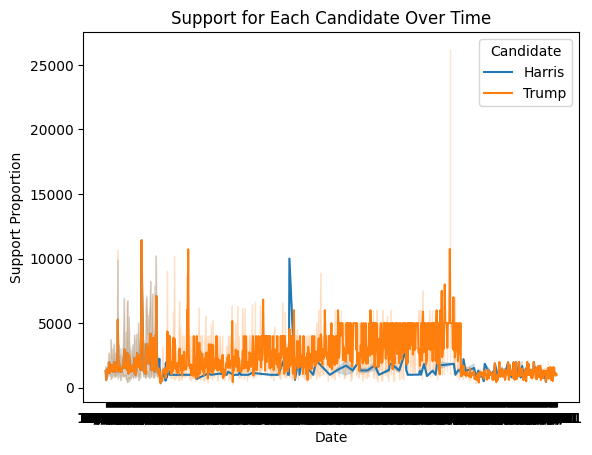

In [8]:
# Plot the support over time for each candidate
sns.lineplot(data=poll_data, x='start_date', y='sample_size', hue='answer')
plt.title('Support for Each Candidate Over Time')
plt.xlabel('Date')
plt.ylabel('Support Proportion')
plt.legend(title='Candidate')
plt.show()

Step by Step

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('president_polls.csv')

# Preview the data
print(data.head())
print(data.columns)


   poll_id  pollster_id    pollster sponsor_ids sponsors display_name  \
0    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   
1    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   
2    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   
3    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   
4    89372         1528  AtlasIntel         NaN      NaN   AtlasIntel   

   pollster_rating_id pollster_rating_name  numeric_grade  pollscore  ...  \
0                 546           AtlasIntel            2.7       -0.8  ...   
1                 546           AtlasIntel            2.7       -0.8  ...   
2                 546           AtlasIntel            2.7       -0.8  ...   
3                 546           AtlasIntel            2.7       -0.8  ...   
4                 546           AtlasIntel            2.7       -0.8  ...   

     stage  nationwide_batch ranked_choice_reallocated ranked_choice_round  \
0  general          

In [11]:
# Select relevant columns and drop rows with missing values in key columns
data = data[['start_date', 'end_date', 'sample_size', 'answer', 'party', 'pct']]
data = data.dropna()


# Ensure the date columns are in datetime format with a specified format
data['start_date'] = pd.to_datetime(data['start_date'], format='%Y-%m-%d')
data['end_date'] = pd.to_datetime(data['end_date'], format='%Y-%m-%d')

# Preview cleaned data
print(data.head())



  start_date   end_date  sample_size  answer party   pct
0 2024-11-03 2024-11-04       2703.0  Harris   DEM  48.1
1 2024-11-03 2024-11-04       2703.0   Trump   REP  49.2
2 2024-11-03 2024-11-04       2703.0   Stein   GRE   1.1
3 2024-11-03 2024-11-04       2703.0    West   IND   0.3
4 2024-11-03 2024-11-04       2703.0  Oliver   LIB   0.1


In [12]:
#Q2
total_observations = data['sample_size'].sum()
print(f"Total Number of Observations: {total_observations}")


Total Number of Observations: 28424961.0


In [17]:
#Q3

# Calculate the weighted average support for each candidate without the deprecation warning
# Calculate the weighted average support for each candidate without triggering deprecation warning
candidate_support = data.groupby('answer', group_keys=False).apply(
    lambda x: pd.Series({
        'Estimated Proportion': np.average(x['pct'], weights=x['sample_size'])
    })
).reset_index()

print("Estimated Support for Each Candidate:")
print(candidate_support)



Estimated Support for Each Candidate:
       answer  Estimated Proportion
0   Ayyadurai              0.594595
1      Ballay              2.000000
2     Beshear             33.273191
3       Biden             41.860629
4      Booker             44.000000
..        ...                   ...
58      Wells              2.000000
59       West              1.375177
60    Whitmer             42.614624
61       Yang              7.301310
62   Youngkin             42.158715

[63 rows x 2 columns]


<ipython-input-17-53b63b2ebef3>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  candidate_support = data.groupby('answer', group_keys=False).apply(


In [25]:
# Calculate weighted support without apply, avoiding the deprecation warning
trend_data = (
    data
    .groupby(['start_date', 'answer'], as_index=False)
    .apply(lambda x: pd.Series({
        'Weighted Support': (x['pct'] * x['sample_size']).sum() / x['sample_size'].sum()
    }))
)

print("Weighted Support for Each Candidate Over Time:")
print(trend_data)


Weighted Support for Each Candidate Over Time:
     start_date    answer  Weighted Support
0    2021-04-03     Biden         46.400000
1    2021-04-03     Trump         42.200000
2    2021-04-12     Biden         43.999322
3    2021-04-12      Cruz         24.000000
4    2021-04-12  DeSantis         25.000000
...         ...       ...               ...
3527 2024-11-03    Harris         48.019788
3528 2024-11-03    Oliver          0.206628
3529 2024-11-03     Stein          0.968164
3530 2024-11-03     Trump         49.701207
3531 2024-11-03      West          0.300000

[3532 rows x 3 columns]


<ipython-input-25-5fe10c63db25>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


In [26]:
#Q4
# Add columns for SE and confidence intervals
candidate_support['SE'] = np.sqrt((candidate_support['Estimated Proportion'] / 100 * (1 - candidate_support['Estimated Proportion'] / 100)) / total_observations)
candidate_support['95% CI Lower Bound'] = candidate_support['Estimated Proportion'] - 1.96 * candidate_support['SE'] * 100
candidate_support['95% CI Upper Bound'] = candidate_support['Estimated Proportion'] + 1.96 * candidate_support['SE'] * 100

print("Candidate Support with 95% Confidence Intervals:")
print(candidate_support[['answer', 'Estimated Proportion', '95% CI Lower Bound', '95% CI Upper Bound']])


Candidate Support with 95% Confidence Intervals:
       answer  Estimated Proportion  95% CI Lower Bound  95% CI Upper Bound
0   Ayyadurai              0.594595            0.591768            0.597421
1      Ballay              2.000000            1.994853            2.005147
2     Beshear             33.273191           33.255868           33.290513
3       Biden             41.860629           41.842493           41.878765
4      Booker             44.000000           43.981752           44.018248
..        ...                   ...                 ...                 ...
58      Wells              2.000000            1.994853            2.005147
59       West              1.375177            1.370895            1.379458
60    Whitmer             42.614624           42.596444           42.632804
61       Yang              7.301310            7.291746            7.310874
62   Youngkin             42.158715           42.140561           42.176869

[63 rows x 4 columns]


In [27]:
#Q5
# Sort candidates by estimated support
top_candidates = candidate_support.sort_values(by='Estimated Proportion', ascending=False).head(2)
p1, p2 = top_candidates['Estimated Proportion'].values / 100  # Convert percentages to proportions

# Calculate spread and confidence interval for spread
spread_estimate = p1 - p2
spread_se = np.sqrt(top_candidates['SE'].values[0]**2 + top_candidates['SE'].values[1]**2) * 100
spread_ci_lower = spread_estimate * 100 - 1.96 * spread_se
spread_ci_upper = spread_estimate * 100 + 1.96 * spread_se

print(f"Estimated Spread: {spread_estimate * 100:.2f}%")
print(f"95% Confidence Interval for Spread: ({spread_ci_lower:.2f}%, {spread_ci_upper:.2f}%)")


Estimated Spread: 1.55%
95% Confidence Interval for Spread: (1.52%, 1.58%)


In [28]:
#Q6
# Z-score for hypothesis test on spread
z_score = (spread_estimate * 100) / spread_se
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"Z Score: {z_score}")
print(f"P-value: {p_value}")


Z Score: 116.90478535204191
P-value: 0.0


<ipython-input-29-af787d913e64>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend_data = data.groupby(['start_date', 'answer']).apply(lambda x: x['weighted_pct'].sum() / x['sample_size'].sum()).reset_index(name='Weighted Support')


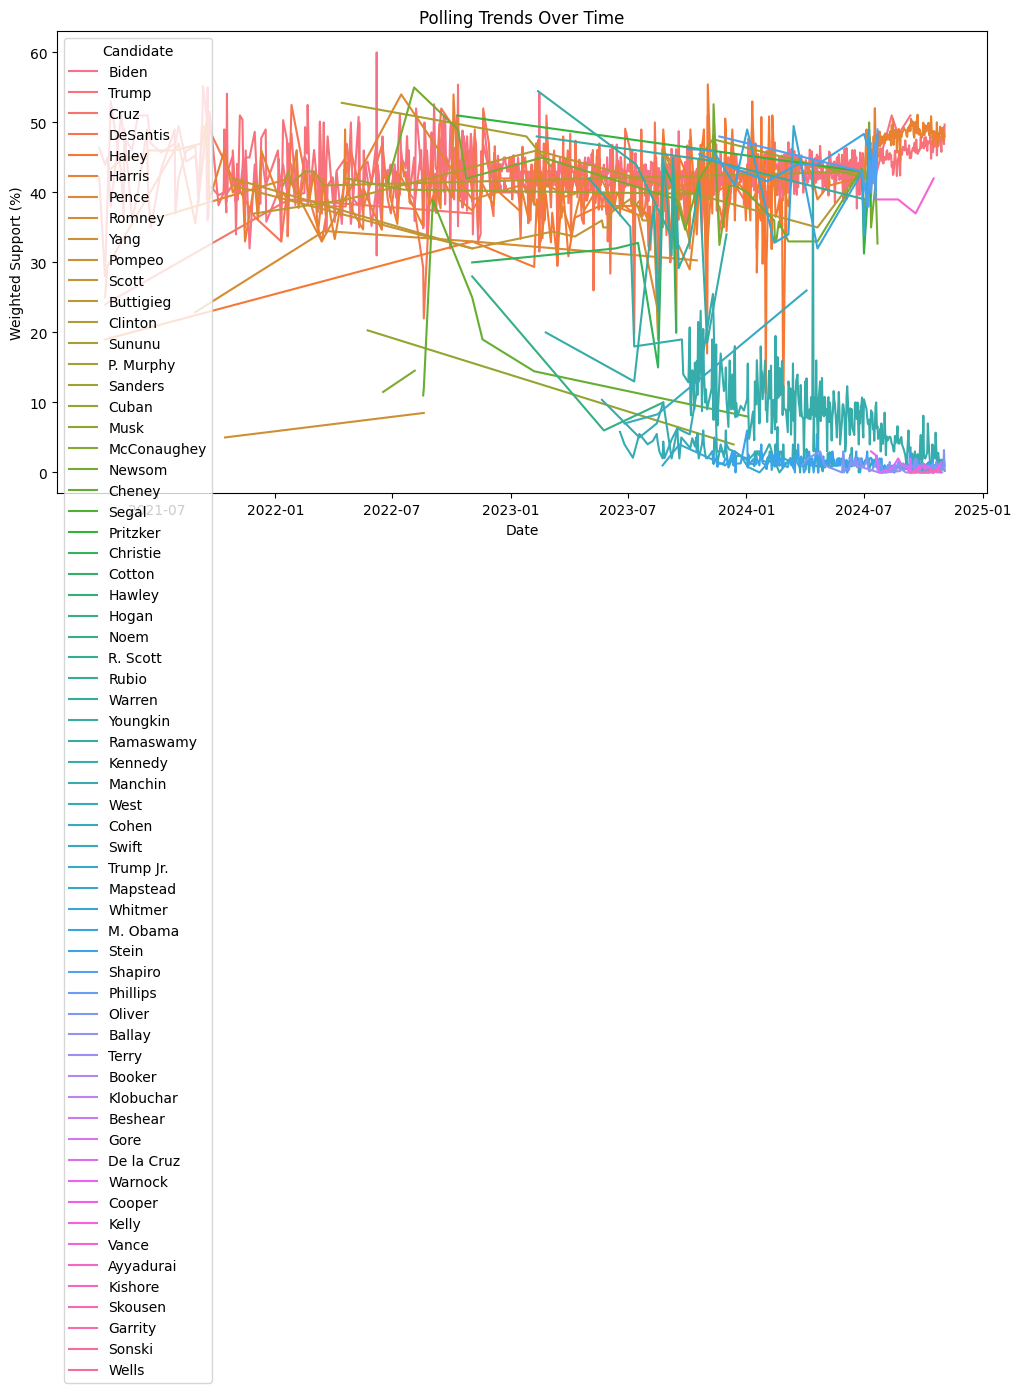

In [29]:
#Q7
# Convert start_date to datetime if not already done
data['start_date'] = pd.to_datetime(data['start_date'])

# Calculate weighted average over time
data['weighted_pct'] = data['pct'] * data['sample_size']
trend_data = data.groupby(['start_date', 'answer']).apply(lambda x: x['weighted_pct'].sum() / x['sample_size'].sum()).reset_index(name='Weighted Support')

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='start_date', y='Weighted Support', hue='answer')
plt.title("Polling Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Weighted Support (%)")
plt.legend(title='Candidate')
plt.show()


In [30]:
# Find the latest date in the dataset Q8
latest_date = data['start_date'].max()

# Filter polls from the latest date
latest_polls = data[data['start_date'] == latest_date]

# Calculate the weighted average support for each candidate on the latest date
latest_support = latest_polls.groupby('answer').apply(lambda x: np.average(x['pct'], weights=x['sample_size'])).reset_index()
latest_support.columns = ['answer', 'Latest Estimated Proportion']

print("Latest Estimated Support for Each Candidate:")
print(latest_support)


Latest Estimated Support for Each Candidate:
   answer  Latest Estimated Proportion
0  Harris                    48.019788
1  Oliver                     0.206628
2   Stein                     0.968164
3   Trump                    49.701207
4    West                     0.300000


<ipython-input-30-5102a0a60af4>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_support = latest_polls.groupby('answer').apply(lambda x: np.average(x['pct'], weights=x['sample_size'])).reset_index()
